<a href="https://colab.research.google.com/github/MariV24/IA-SPAM/blob/main/SQUAD5_SPAM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Abordagens para dados desbalanceados interessantes para ajuda na análise:

Overfitting e Underfitting:
- One-side-selection;

#Importando tabela e bibliotecas úteis

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# bibliotecas de Aprendizagem de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
# Importando as técnicas de aprendizagem (Classificadores) 
from sklearn.tree import DecisionTreeClassifier #árvore de decisão
from sklearn.neighbors import KNeighborsClassifier #knn

from google.colab import files
uploaded = files.upload()

# Documento necessitou do encoding para poder ser aberto, por questões de dados textuais etc...
df = pd.read_csv('spam.csv', sep=",", encoding="ISO-8859-1")
data = pd.read_csv('spam.csv', sep=",", encoding="ISO-8859-1")

# Link da base de dados (baixar para apresentação)
# https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset?resource=download


# Não adicionando index, pois a tabela não contém. Com a ausência, o próprio Colab cria (tabela autoincremental: 0,1,2...)

Saving spam.csv to spam.csv


In [3]:
# Primeira exibição da tabela, para ver a situação dos dados
df.head(10)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
5,spam,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN
6,ham,Even my brother is not like to speak with me. ...,NaN,NaN,NaN
7,ham,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN
8,spam,WINNER!! As a valued network customer you have...,NaN,NaN,NaN
9,spam,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN


In [ ]:
#data.head(10)

In [4]:
# Visto que há colunas somente com "NAN não contendo informação útil, resolvemos retirá-las

df.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [ ]:
#data.drop(["Unnamed: 2", "Unnamed: 3","Unnamed: 4"], axis=1, inplace=True)

In [5]:
# Renomenando as colunas para melhorar a apresentação

df.rename(columns={'v1': 'Classe', 'v2':'SMS'}, inplace = True)

In [17]:
df.rename(columns={'#': 'Count'}, inplace = True)

In [ ]:
#data.rename(columns={'v1': 'Classe', 'v2':'SMS'}, inplace = True)

In [6]:
# Exibindo as colunas

df.columns

Index(['Classe', 'SMS'], dtype='object')

In [ ]:
#data.columns

Index(['Classe', 'SMS'], dtype='object')

In [18]:
# Visualização da tabela aperfeiçõada e pronta para gráficos

df.head(10)

,Classe,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
5,spam,FreeMsg Hey there darling it's been 3 week's n...
6,ham,Even my brother is not like to speak with me. ...
7,ham,As per your request 'Melle Melle (Oru Minnamin...
8,spam,WINNER!! As a valued network customer you have...
9,spam,Had your mobile 11 months or more? U R entitle...


In [ ]:
#data.head(5)

In [35]:
# https://www.youtube.com/watch?v=BVRuD6_kcjE

# Contagem de valores de tipos diferentes dentro da coluna. E caso houvesse nulo, com o parâmetro dropna como falso, ele mostraria a contagem dos NaN
df['Classe'].value_counts(dropna=False, normalize=True)  * 100
# Parâmetros que podem ser passados:
# sort(ordena a lista) ascending(se sort=True, pode ordenar de forma decrescente ou crescente; True=crescente, False=decrescente) 
# normalize(porcentagem;) 

ham     86.593683
spam    13.406317
Name: Classe, dtype: float64

In [ ]:
i = 0
while i < df.size :
    df['index'] = (df.size - df.size + (i+1))


In [58]:
df.head()

,Classe,SMS,index
0,ham,"Go until jurong point, crazy.. Available only ...",16715
1,ham,Ok lar... Joking wif u oni...,16715
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,16715
3,ham,U dun say so early hor... U c already then say...,16715
4,ham,"Nah I don't think he goes to usf, he lives aro...",16715


In [8]:
# Informações sobre as colunas, nulos e tipos

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Classe  5572 non-null   object
 1   SMS     5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
# Algumas informações sobre o dataframe: contagem, dados únicos, o que mais incidiu e o número de frequência

df.describe()

,Classe,SMS
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [10]:
# SMS que menos aparece

df.SMS.min()

' &lt;#&gt;  in mca. But not conform.'

ValueError: ignored

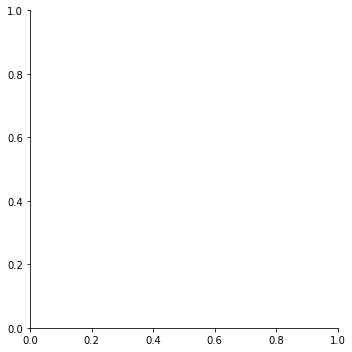

In [14]:
sns.lmplot('Classe', 'SMS', df, hue = 'Classe', fit_reg=False)   #percebemos os limites da classe majoritária (0) e minoritário (1)

#Nltk

In [ ]:
#Importando biblioteca NLTK para separação, tratamento e alguns gráficos

from nltk.corpus import treebank
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('treebank')
!pip install svgling
!pip install nltk

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Package treebank is already up-to-date!


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Passando a coluna SMS para a variável frases, de forma que fique tudo em uma só string
frases = df['SMS'].to_string(index=False).strip().replace('\n','')
frases

'Go until jurong point, crazy.. Available only i...                     Ok lar... Joking wif u oni...Free entry in 2 a wkly comp to win FA Cup final... U dun say so early hor... U c already then say...Nah I don\'t think he goes to usf, he lives arou...FreeMsg Hey there darling it\'s been 3 week\'s no...Even my brother is not like to speak with me. T...As per your request \'Melle Melle (Oru Minnaminu...WINNER!! As a valued network customer you have ...Had your mobile 11 months or more? U R entitled...I\'m gonna be home soon and i don\'t want to talk...SIX chances to win CASH! From 100 to 20,000 pou...URGENT! You have won a 1 week FREE membership i...I\'ve been searching for the right words to than...               I HAVE A DATE ON SUNDAY WITH WILL!!XXXMobileMovieClub: To use your credit, click t...                        Oh k...i\'m watching here:)Eh u remember how 2 spell his name... Yes i did...Fine if thatåÕs the way u feel. ThatåÕs the way...England v Macedonia - dont miss the goals

In [ ]:
# Trocando informação para outra variável, só pelo nome mesmo. (padrão do nltk)
sentence = frases

# Utilizando tokenize

In [ ]:
# Utilizando comandos tokenize: basicamente slice por espaço
# Relizaremos análise por palavra, por isso estaremos utilizando o tokenize inicialmente.

#Importando a biblioteca
from nltk.tokenize import sent_tokenize, word_tokenize

# Criando a variável tokens para armazenar as palavras grosso modo.
tokens = nltk.word_tokenize(sentence)
tokens

['Go',
 'until',
 'jurong',
 'point',
 ',',
 'crazy',
 '..',
 'Available',
 'only',
 'i',
 '...',
 'Ok',
 'lar',
 '...',
 'Joking',
 'wif',
 'u',
 'oni',
 '...',
 'Free',
 'entry',
 'in',
 '2',
 'a',
 'wkly',
 'comp',
 'to',
 'win',
 'FA',
 'Cup',
 'final',
 '...',
 'U',
 'dun',
 'say',
 'so',
 'early',
 'hor',
 '...',
 'U',
 'c',
 'already',
 'then',
 'say',
 '...',
 'Nah',
 'I',
 'do',
 "n't",
 'think',
 'he',
 'goes',
 'to',
 'usf',
 ',',
 'he',
 'lives',
 'arou',
 '...',
 'FreeMsg',
 'Hey',
 'there',
 'darling',
 'it',
 "'s",
 'been',
 '3',
 'week',
 "'s",
 'no',
 '...',
 'Even',
 'my',
 'brother',
 'is',
 'not',
 'like',
 'to',
 'speak',
 'with',
 'me',
 '.',
 'T',
 '...',
 'As',
 'per',
 'your',
 'request',
 "'Melle",
 'Melle',
 '(',
 'Oru',
 'Minnaminu',
 '...',
 'WINNER',
 '!',
 '!',
 'As',
 'a',
 'valued',
 'network',
 'customer',
 'you',
 'have',
 '...',
 'Had',
 'your',
 'mobile',
 '11',
 'months',
 'or',
 'more',
 '?',
 'U',
 'R',
 'entitled',
 '...',
 'I',
 "'m",
 'gon',
 

# Stopwords

In [ ]:
# Importando as 'stopwords', as palavras que queremos ignorar, como 'in', 'is' e 'an'.
nltk.download("stopwords")
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
# Definindo para a lingua inglesa (idioma que estão as frases dos dados)
stop_words = set(stopwords.words("english"))

In [ ]:
# Criando uma lista para colocar as palavras filtradas
filtered_list = []

In [ ]:
# Lógica para cara palavra na lista de tokens feita anterior, a máquina verificará se está nas stopwords e adicionará na lista se não estiver.
for word in tokens:
  if word.casefold() not in stop_words:
    filtered_list.append(word)

In [ ]:
# Exibindo a lista de palavras filtradas
print(filtered_list)

# Foi filtrado palavras como verbo to be "am" e artigos "a", como também o advérbio de negação "not".
# Para identificação de SPAM, palavras e sentenças no imperativo são mais relevantes, então podemos deixar as palavras filtradas como estão.

['Go', 'jurong', 'point', ',', 'crazy', '..', 'Available', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', '...', 'U', 'dun', 'say', 'early', 'hor', '...', 'U', 'c', 'already', 'say', '...', 'Nah', "n't", 'think', 'goes', 'usf', ',', 'lives', 'arou', '...', 'FreeMsg', 'Hey', 'darling', "'s", '3', 'week', "'s", '...', 'Even', 'brother', 'like', 'speak', '.', '...', 'per', 'request', "'Melle", 'Melle', '(', 'Oru', 'Minnaminu', '...', 'WINNER', '!', '!', 'valued', 'network', 'customer', '...', 'mobile', '11', 'months', '?', 'U', 'R', 'entitled', '...', "'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', '...', 'SIX', 'chances', 'win', 'CASH', '!', '100', '20,000', 'pou', '...', 'URGENT', '!', '1', 'week', 'FREE', 'membership', '...', "'ve", 'searching', 'right', 'words', '...', 'DATE', 'SUNDAY', '!', '!', 'XXXMobileMovieClub', ':', 'use', 'credit', ',', 'click', '...', 'Oh', 'k', '...', "'m", 'watching

# Stemming

In [ ]:
# Importando bibliotecas para stemming, que é reduzir a palavra para seu mínimo/sua raiz. Ex.: helping e helper podem ser diminuidas a 'help'.
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

In [ ]:
# Criando o stemmer
stemmer = PorterStemmer()

In [ ]:
# Agora vamos pegar o resultado da lista filtrada e adicioná-la aqui para o stemmer
words = filtered_list

In [ ]:
# Criando variável para as palavras reduzidas e dizendo para reduzir para por palavra nas palavras da lista filtrada (words)
stemmed_words = [stemmer.stem(word) for word in words]

In [ ]:
# Exibindo a lista stemmed_words
print(stemmed_words)

['go', 'jurong', 'point', ',', 'crazi', '..', 'avail', '...', 'ok', 'lar', '...', 'joke', 'wif', 'u', 'oni', '...', 'free', 'entri', '2', 'wkli', 'comp', 'win', 'fa', 'cup', 'final', '...', 'u', 'dun', 'say', 'earli', 'hor', '...', 'u', 'c', 'alreadi', 'say', '...', 'nah', "n't", 'think', 'goe', 'usf', ',', 'live', 'arou', '...', 'freemsg', 'hey', 'darl', "'s", '3', 'week', "'s", '...', 'even', 'brother', 'like', 'speak', '.', '...', 'per', 'request', "'mell", 'mell', '(', 'oru', 'minnaminu', '...', 'winner', '!', '!', 'valu', 'network', 'custom', '...', 'mobil', '11', 'month', '?', 'u', 'r', 'entitl', '...', "'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', '...', 'six', 'chanc', 'win', 'cash', '!', '100', '20,000', 'pou', '...', 'urgent', '!', '1', 'week', 'free', 'membership', '...', "'ve", 'search', 'right', 'word', '...', 'date', 'sunday', '!', '!', 'xxxmobilemovieclub', ':', 'use', 'credit', ',', 'click', '...', 'oh', 'k', '...', "'m", 'watch', ':', ')', 'eh', 'u', 'remem

In [ ]:
""" Há possíveis erros com o stemmed, como o Understemming, que é quando as palavras deveriam ser reduzidas a mesma palavra e por alguma razão não foram, caracterizando falso negativo.
E também o Overstemming, que é quando acontece o contrário: palavras diferentes são reduzidas a mesma palavra. Este é um falso positivo. 
Mais a frente poderemos separar melhor e realizar análises com o Lemmatizer, que faz o mesmo, porém com algumas coisas diferentes. """

# Separando palavras por funções gramaticais

In [ ]:
# A bilioteca necessária para a pos_tag já está dentro do nltk, então não é preciso importar novamente

words_tagged = nltk.pos_tag(words)


In [ ]:
# Exibindo
print(words_tagged)

[('Go', 'VB'), ('jurong', 'JJ'), ('point', 'NN'), (',', ','), ('crazy', 'JJ'), ('..', 'NN'), ('Available', 'NNP'), ('...', ':'), ('Ok', 'NNP'), ('lar', 'NN'), ('...', ':'), ('Joking', 'NNP'), ('wif', 'WRB'), ('u', 'JJ'), ('oni', 'NN'), ('...', ':'), ('Free', 'JJ'), ('entry', 'NN'), ('2', 'CD'), ('wkly', 'JJ'), ('comp', 'NN'), ('win', 'VBP'), ('FA', 'NNP'), ('Cup', 'NNP'), ('final', 'JJ'), ('...', ':'), ('U', 'JJ'), ('dun', 'NNS'), ('say', 'VBP'), ('early', 'JJ'), ('hor', 'NN'), ('...', ':'), ('U', 'NNP'), ('c', 'VBP'), ('already', 'RB'), ('say', 'VBP'), ('...', ':'), ('Nah', 'VBP'), ("n't", 'RB'), ('think', 'VB'), ('goes', 'VBZ'), ('usf', 'RB'), (',', ','), ('lives', 'VBZ'), ('arou', 'NNS'), ('...', ':'), ('FreeMsg', 'NNP'), ('Hey', 'NNP'), ('darling', 'VBG'), ("'s", 'POS'), ('3', 'CD'), ('week', 'NN'), ("'s", 'POS'), ('...', ':'), ('Even', 'RB'), ('brother', 'VBP'), ('like', 'IN'), ('speak', 'NN'), ('.', '.'), ('...', ':'), ('per', 'IN'), ('request', 'NN'), ("'Melle", 'CD'), ('Melle',

In [ ]:
# Em teoria, mostraria todas as tags e seus significados, mas não funciona até o momento.
nltk.help.upenn_tagset()

#-----

In [ ]:
#Utilizando nltk para gráfico de linha: palavra x frequência

from nltk import FreqDist #Importando
dist_freq = FreqDist(words) #Definindo uma variável com elementos aceitos pelo FreqDist (palavras)
print(dist_freq) #Output quantitativo se samples

<FreqDist with 7719 samples and 38762 outcomes>


In [ ]:
# Exibindo os 20 mais comuns
dist_freq.most_common(20)

[('...', 3778),
 ('.', 1688),
 (',', 1019),
 ('?', 846),
 ('!', 616),
 ('u', 442),
 (':', 386),
 ('..', 360),
 ('&', 345),
 ("'s", 316),
 (';', 301),
 ("'m", 280),
 (')', 263),
 ('2', 237),
 ('U', 208),
 ("n't", 194),
 ('call', 191),
 ('get', 169),
 ("'ll", 167),
 ('ur', 161)]

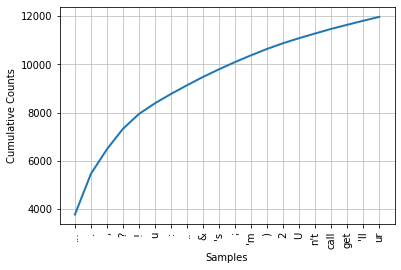

In [ ]:
# Colocando-os no gráfico
dist_freq.plot(20, cumulative=True)

# Retirando caracteres especiais

Como podemos observar, quando listamos as palavras que mais se repetem, quase que só aparecem caracteres especiais, pois são muito comuns em mensagens que não sao spam também ( e são 75% das mensagens, basicamente ). Por isso há a necessidade de tirar as irrelevantes para nossas análises.

In [ ]:
filtered_list2 = []

In [ ]:
print(filtered_list)

['Go', 'jurong', 'point', ',', 'crazy', '..', 'Available', '...', 'Ok', 'lar', '...', 'Joking', 'wif', 'u', 'oni', '...', 'Free', 'entry', '2', 'wkly', 'comp', 'win', 'FA', 'Cup', 'final', '...', 'U', 'dun', 'say', 'early', 'hor', '...', 'U', 'c', 'already', 'say', '...', 'Nah', "n't", 'think', 'goes', 'usf', ',', 'lives', 'arou', '...', 'FreeMsg', 'Hey', 'darling', "'s", '3', 'week', "'s", '...', 'Even', 'brother', 'like', 'speak', '.', '...', 'per', 'request', "'Melle", 'Melle', '(', 'Oru', 'Minnaminu', '...', 'WINNER', '!', '!', 'valued', 'network', 'customer', '...', 'mobile', '11', 'months', '?', 'U', 'R', 'entitled', '...', "'m", 'gon', 'na', 'home', 'soon', "n't", 'want', 'talk', '...', 'SIX', 'chances', 'win', 'CASH', '!', '100', '20,000', 'pou', '...', 'URGENT', '!', '1', 'week', 'FREE', 'membership', '...', "'ve", 'searching', 'right', 'words', '...', 'DATE', 'SUNDAY', '!', '!', 'XXXMobileMovieClub', ':', 'use', 'credit', ',', 'click', '...', 'Oh', 'k', '...', "'m", 'watching

In [ ]:
# Lógica utilizando função str.translate().
# Ele mapeia cada caractere da string por meio de uma tabela de tradução criada usando a função str.maketrans()

if __name__ == '__main__':
 
    ss = filtered_list
    to_remove = [',','.', '$', ';', '...', '..', ';;', ';;;', '(', ')', ':', '2', '?', '!', '-', '_']

    chars = set(to_remove)
    filtered_list2 = ';'.join(filter(lambda x: x not in chars, ss))
    print(filtered_list2)

Go;jurong;point;crazy;Available;Ok;lar;Joking;wif;u;oni;Free;entry;wkly;comp;win;FA;Cup;final;U;dun;say;early;hor;U;c;already;say;Nah;n't;think;goes;usf;lives;arou;FreeMsg;Hey;darling;'s;3;week;'s;Even;brother;like;speak;per;request;'Melle;Melle;Oru;Minnaminu;WINNER;valued;network;customer;mobile;11;months;U;R;entitled;'m;gon;na;home;soon;n't;want;talk;SIX;chances;win;CASH;100;20,000;pou;URGENT;1;week;FREE;membership;'ve;searching;right;words;DATE;SUNDAY;XXXMobileMovieClub;use;credit;click;Oh;k;'m;watching;Eh;u;remember;spell;name;Yes;Fine;thatåÕs;way;u;feel;ThatåÕs;way;England;v;Macedonia;dont;miss;goals/team;seriously;spell;name;IÛ÷m;going;try;months;ha;ha;jokingSo;Ì_;pay;first;lar;da;stock;co;Aft;finish;lunch;go;str;lor;Ffffffffff;Alright;way;meet;forced;eat;slice;'m;really;n;Lol;always;convincing.Did;catch;bus;frying;egg;'m;back;&;amp;'re;packing;car;'ll;Ahhh;Work;vaguely;remember;Wait;'s;still;clear;Yeah;got;v;apologetic;n;K;tell;anything;you.For;fear;fainting;house;Thanks;subscr

In [ ]:
words2 = filtered_list2.replace(";", " ")

In [ ]:
words2

"Go jurong point crazy Available Ok lar Joking wif u oni Free entry wkly comp win FA Cup final U dun say early hor U c already say Nah n't think goes usf lives arou FreeMsg Hey darling 's 3 week 's Even brother like speak per request 'Melle Melle Oru Minnaminu WINNER valued network customer mobile 11 months U R entitled 'm gon na home soon n't want talk SIX chances win CASH 100 20,000 pou URGENT 1 week FREE membership 've searching right words DATE SUNDAY XXXMobileMovieClub use credit click Oh k 'm watching Eh u remember spell name Yes Fine thatåÕs way u feel ThatåÕs way England v Macedonia dont miss goals/team seriously spell name I\x89Û÷m going try months ha ha jokingSo Ì_ pay first lar da stock co Aft finish lunch go str lor Ffffffffff Alright way meet forced eat slice 'm really n Lol always convincing.Did catch bus frying egg 'm back & amp 're packing car 'll Ahhh Work vaguely remember Wait 's still clear Yeah got v apologetic n K tell anything you.For fear fainting house Thanks su

In [ ]:
wordss = word_tokenize(words2)

In [ ]:
dist_freq = FreqDist(wordss)
print(dist_freq)

<FreqDist with 7696 samples and 29108 outcomes>


In [ ]:
dist_freq.most_common(20)

[('u', 442),
 ('&', 345),
 ("'s", 316),
 ("'m", 280),
 ('U', 208),
 ("n't", 194),
 ('call', 191),
 ('get', 169),
 ("'ll", 167),
 ('ur', 161),
 ('got', 154),
 ('know', 151),
 ('4', 145),
 ('lt', 144),
 ('go', 134),
 ('gt', 129),
 ('come', 129),
 ('like', 124),
 ('#', 120),
 ('Ok', 119)]

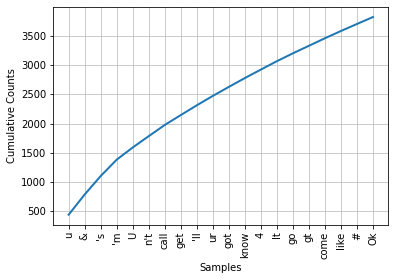

In [ ]:
dist_freq.plot(20, cumulative=True)

# Lemmatizing

In [ ]:
# Utilizando "Lemma"
# Basicamente, uma palavra que representa um grupo inteiro de palavras que é chamado de "lexema"
# Exemplo: se procurar pela palavra "mistura" no dicionário, terá de procurar em "misturar" e acharia "misturando" na lista.
# Então o "mistura" seria o 'Lemma' e o "misturando" seria o 'lexeme'.
# Então, por fim, quando você "Lemmatiza" uma palavra, você está reduzindo a palavra ao "Lemma" dela.


from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')
nltk.download('omw-1.4')

#Preparando o Lemmatizer
lemmatizer = WordNetLemmatizer()
#words = word_tokenize(frases) # Linkando o método com a variável de string 'frase'

# Criando variável para lematizar as palavras na lista palavra por palavra.
lemmatized_words = [lemmatizer.lemmatize(word) for word in wordss]


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [ ]:
lemmatized_words

['Go',
 'jurong',
 'point',
 'crazy',
 'Available',
 'Ok',
 'lar',
 'Joking',
 'wif',
 'u',
 'oni',
 'Free',
 'entry',
 'wkly',
 'comp',
 'win',
 'FA',
 'Cup',
 'final',
 'U',
 'dun',
 'say',
 'early',
 'hor',
 'U',
 'c',
 'already',
 'say',
 'Nah',
 "n't",
 'think',
 'go',
 'usf',
 'life',
 'arou',
 'FreeMsg',
 'Hey',
 'darling',
 "'s",
 '3',
 'week',
 "'s",
 'Even',
 'brother',
 'like',
 'speak',
 'per',
 'request',
 "'Melle",
 'Melle',
 'Oru',
 'Minnaminu',
 'WINNER',
 'valued',
 'network',
 'customer',
 'mobile',
 '11',
 'month',
 'U',
 'R',
 'entitled',
 "'m",
 'gon',
 'na',
 'home',
 'soon',
 "n't",
 'want',
 'talk',
 'SIX',
 'chance',
 'win',
 'CASH',
 '100',
 '20,000',
 'pou',
 'URGENT',
 '1',
 'week',
 'FREE',
 'membership',
 "'ve",
 'searching',
 'right',
 'word',
 'DATE',
 'SUNDAY',
 'XXXMobileMovieClub',
 'use',
 'credit',
 'click',
 'Oh',
 'k',
 "'m",
 'watching',
 'Eh',
 'u',
 'remember',
 'spell',
 'name',
 'Yes',
 'Fine',
 'thatåÕs',
 'way',
 'u',
 'feel',
 'ThatåÕs',
 

In [ ]:
# Repassando as palavras 'Lemmatizadas' para uma nova variável
new_text = nltk.Text(lemmatized_words)

In [ ]:
# Expressões mais localizadas pelo 'Lemma'
# Lembrando que o 'Lemma' pode ter alterado as palavras para formas mais curtas.
new_text.collocations()

Sorry 'll; Account Statement; 'll call; call later; 2003 Account;
trying contact; PRIVATE 2003; Please call; tried contact; dating
service; secret admirer; Pls send; å£150 worth; chance win; 500 pound;
cash-balance currently; worth discount; Costa Del; Del Sol; SiPix
Digital


# Entities

In [ ]:
entities = nltk.chunk.ne_chunk(tagged)
print(entities)

# Treebank

In [ ]:
t = treebank.parsed_sents('wsj_0001.mrg')[0]
t.draw()

TclError: ignored

# Machine Learningh

In [ ]:
# Machine Learning

# bibliotecas de Aprendizagem de máquina
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Importando as técnicas de aprendizagem (Classificadores) 
from sklearn.tree import DecisionTreeClassifier #árvore de decisão
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes 
from sklearn.neighbors import KNeighborsClassifier #knn
from sklearn.linear_model import LogisticRegression #Regressão Logística
from sklearn.ensemble import RandomForestClassifier #Random Forest
from sklearn.neural_network import MLPClassifier #Multlayer Perceptron Rede Neural

# bibliotecas de Aprendizagem de máquina
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score #
from sklearn.model_selection import StratifiedKFold #
from sklearn.model_selection import KFold #

# Importanto técnicas de avaliação de modelos 
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn import metrics #

In [ ]:
# Processo de organização dos dados

df = df.pop('Classe')



In [ ]:
df.head(5)

0     ham
1     ham
2    spam
3     ham
4     ham
Name: Classe, dtype: object

In [ ]:
dados_selecao = df[["Classe", "SMS"]] 
dados_selecao.head()

,Classe,SMS
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
# HOLDOUT
# Separação aleatória em conjuntos de treino e teste  (Treino = Para etapa de aprendizagem;  Teste = Para avaliar  o desempenho do modelo em novos dados)
array = dados_selecao.values
X = array[:, 2:2].astype(float)  #variáveis explicativas 
Y = array[:, 1]  #variável resposta
test_size = 0.50

np.random.seed(7) #fixar aleatoriedade para reproução 
X_treino, X_teste, Y_treino, Y_teste = train_test_split(X, Y, test_size=test_size)

In [ ]:
# Treinando modelos 
# Preparação do modelo 1 =  Árvore de Decisão
model1 = DecisionTreeClassifier()
model1.fit(X_treino, Y_treino)


# Preparação do modelo 3 = KNN
model3 = KNeighborsClassifier(n_neighbors=7)
model3.fit(X_treino, Y_treino)

# Preparação do modelo 4 = Naive Bayes
model4 = GaussianNB()
model4.fit(X_treino, Y_treino)

# Preparação do modelo 5 = Regressão Logística
model5 = LogisticRegression()
model5.fit(X_treino, Y_treino)

# Preparação do modelo 6 = Random Forest
model6 = RandomForestClassifier()
model6.fit(X_treino, Y_treino)

# Preparação do modelo 7 = MLP Rede Neural
model7 = MLPClassifier()
model7.fit(X_treino, Y_treino)


ValueError: ignored

#Referências



*   https://realpython.com/nltk-nlp-python/
*   https://www.nltk.org/



